# SVL 00 - Python Primer

In [2]:
import numpy as np

## Task 1

Implement a function that creates a dictionary with the following words as keys and each word's length as the key's value:

In [3]:
words = "Implement a function that creates a dictionary with the following words as keys and each word's length as the key's value"

In [4]:
def func(words):
    
    D = {k: len(k) for k in words.split()}
    
    return D

func(words)

{'Implement': 9,
 'a': 1,
 'function': 8,
 'that': 4,
 'creates': 7,
 'dictionary': 10,
 'with': 4,
 'the': 3,
 'following': 9,
 'words': 5,
 'as': 2,
 'keys': 4,
 'and': 3,
 'each': 4,
 "word's": 6,
 'length': 6,
 "key's": 5,
 'value': 5}

# Task 2

Implement a function that computes the Precision and Recall from the following confusion matrix:

In [5]:
C = np.array([[97, 29],[3, 71]]) 
# Assume: 
# rows = predicted classes (row0=positive,row1=negative), 
# cols = true classes (col0=positive, col1=negative)

In [6]:
def precision_recall(conf_mat):
    prec = 0.
    reca = 0.
    
    prec = C[0,0] / C[0,:].sum()
    reca = C[0,0] / C[:,0].sum()
    
    return prec, reca

precision_recall(C)

(0.7698412698412699, 0.97)

# Task 3

Implement the inner product for two matrices $$C^{(k, n)} = A^{(k, m)} * B^{(m, n)}$$ without using numpy:

In [7]:
A = [
     [3, 4, 1], 
     [7, -1, 2]
    ]
B = [
     [-1, 2],
     [7, -2], 
     [0, 3]
    ]

In [8]:
def matmul(A, B):
    
    K = len(A)
    M = len(A[0])
    N = len(B[0])
    
    C = [[0 for _ in range(N)] for _ in range(K)]
    
    for k in range(K):
        for n in range(N):
            for m in range(M):
                C[k][n] += A[k][m] * B[m][n]
                
    return C

matmul(A, B)

[[25, 1], [-14, 22]]

# Task 4

Implement the skeleton of a class 'MyEstimator'. The purpose of the class is to wrap the functionality of an arbitrary supervised learning algorithm. It needs to provide the following interface:
- The constructor must accept a variable number of key-value arguments
- The class must provide a 'fit' method, that accepts a numpy ndarray type named 'X' and another numpy ndarray type named 'y'. The method must return the object it was called on.
- The class must provide a 'predict' method, that accepts a numpy ndarray type named 'X'.

In [9]:
class MyEstimator:
    
    def __init__(self, *args, **kwargs):
        self._myargs = kwargs
        
        for arg in args:
            print(arg)
            
        for k, v in kwargs.items():
            print(k, v)
    
    def fit(self, X : np.ndarray, y : np.ndarray):
        return self
    
    def predict(self, X : np.ndarray):
        return self

In [10]:
clf = MyEstimator(7, param1=3, param2="hosdlf")

7
param1 3
param2 hosdlf


# Task 5: LMS algorithm

In [11]:
import matplotlib.pyplot as plt

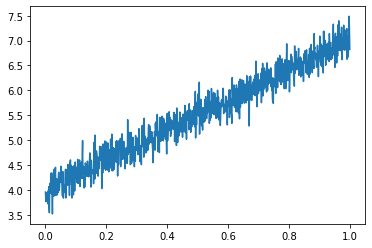

In [12]:
# Dataset
N = 1000
x = np.linspace(0, 1, N)
y = 4 + 3 * x + np.random.normal(0, 0.2, N)
D = [(x[i], y[i]) for i in range(N)]
plt.plot(x, y)

In [16]:
def lms(dataset, eta):
    w0, w1 = np.random.normal(100, 0.1, 2)
    
    #algorithm
    
    i = 1
    
    for _ in range(1000):
        data_index = np.random.choice(len(dataset))
        x, y = dataset[data_index]

        h_x = w0 + w1 * x
        
        err = y - h_x
        i += 1
        
        if i % 100 == 0:
            print(i, abs(err))
        
        w0 += eta * err
        w1 += eta * err * x
        
    return w0, w1        

In [17]:
w0, w1 = lms(D, 0.1)

100 2.0511540098835015
200 3.069964523100343
300 1.4407236964674874
400 1.4441098672519503
500 0.1913031441058708
600 0.520792310476669
700 0.40293644979838295
800 0.0462438947063637
900 0.20916901849575176
1000 0.1563526441973142


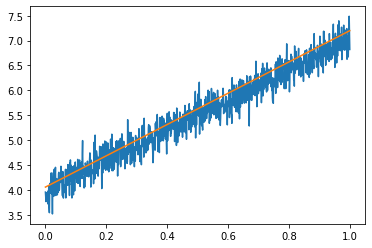

In [32]:
plt.plot(x, y)
plt.plot(x, w0 + x * w1)